/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


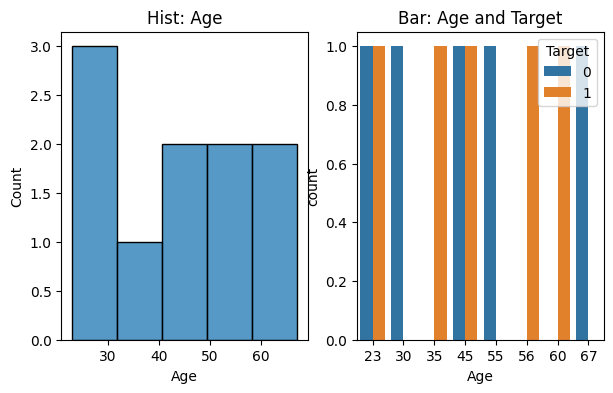

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import ipywidgets as widgets
from IPython.display import display

# A dictionary to store the user choices for each column
distribution_choices = {}

# Function to display widgets for marking distribution type
def mark_distribution(column):
    # Creating the widget buttons for marking distribution type
    button_normal = widgets.Button(description="Normal")
    button_log = widgets.Button(description="Log")
    button_other = widgets.Button(description="Other")
    
    # Define the callback functions for each button
    def on_button_normal_clicked(b):
        distribution_choices[column] = 'Normal'
        print(f"Marked {column} as Normal Distribution")

    def on_button_log_clicked(b):
        distribution_choices[column] = 'Log'
        print(f"Marked {column} as Log Distribution")

    def on_button_other_clicked(b):
        distribution_choices[column] = 'Other'
        print(f"Marked {column} as Other Distribution")

    # Assign the button functions to be triggered on click
    button_normal.on_click(on_button_normal_clicked)
    button_log.on_click(on_button_log_clicked)
    button_other.on_click(on_button_other_clicked)
    
    buttons = widgets.HBox([button_normal, button_log, button_other])
    
    # Display the buttons
    display(buttons)

# A plotting function that will use the widget for marking distributions
def HistAndBar(data, column, target="Target"):
    warnings.simplefilter("ignore", category=UserWarning)
    
    # Show the plot first
    fig, axes = plt.subplots(1,2, figsize=(7,4))
    sns.histplot(data=data, x=column, ax=axes[0])
    axes[0].set_title(f"Hist: {column}")
    sns.countplot(data=data, x=column, hue=target, ax=axes[1])
    axes[1].set_title(f"Bar: {column} and {target}")
    plt.show()
    
    # Now, show the widgets for marking the distribution
    mark_distribution(column)

# Example DataFrame
data = pd.DataFrame({
    'Age': [23, 45, 56, 23, 35, 67, 45, 30, 60, 55],
    'Target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Example of calling the function
HistAndBar(data, 'Age')

In [3]:
print(distribution_choices)

{'Age': 'Other'}
